# **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.



we sill use two models: **The simple Linear Regression and the Ridge**



## **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [29]:
# Importing all libraries required in this notebook
from sklearn import metrics 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
s_data = pd.read_csv('s_data.csv')

In [3]:
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

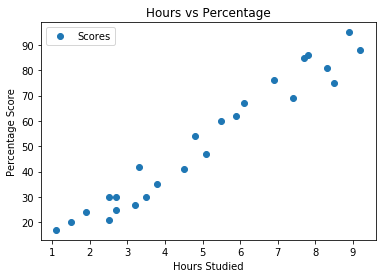

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**We have a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [44]:
s_data_Input = s_data.iloc[:, :-1].values  
s_data_Output = s_data.iloc[:, 1].values  

In [45]:
s_data_Input.shape

(25, 1)

In [46]:
s_data_Output.shape

(25,)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [47]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(s_data_Input, s_data_Output, 
                            test_size=0.25, random_state=42) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [48]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
linreg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [49]:
print(linreg.intercept_)
print(linreg.coef_)

2.480367091505748
[9.71409219]


$$Scores = 2.48 + 9.71 \times Hours $$

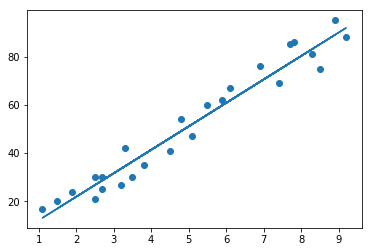

In [50]:
# Plotting the regression line
line = linreg.coef_*X+linreg.intercept_

# Plotting for the test data
plt.scatter(s_data_Input, s_data_Output)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [51]:
print(X_test) # Testing data - In Hours
y_pred = linreg.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]]


In [52]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [53]:
 print('Mean Square Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Square Error: 4.8493706843873285


In [54]:
linreg.score(X_train,y_train)

0.9514783240656937

In [55]:
linreg.score(X_test,y_test)

0.9553509219739938

Let's use this model to predict the score knowing the hours

In [56]:
hours = np.array([9.25])
hours.reshape(1,-1)

array([[9.25]])

In [57]:
# You can also test with your own data
#hours = np.array([9.25])
own_pred = linreg.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 92.33571987331146


## **Training the Algorithm with Ridge**

In the first part, we have used Simple Linear regression to solve the problem, now in this part, we will use the L2 regularization to approach the problem. 


In [58]:
from sklearn.linear_model import Ridge

In [59]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [60]:
y_predrid = ridge.predict(X_test)

In [61]:
y_predrid

array([82.9776868 , 26.87678819, 26.87678819, 69.43609058, 59.76352186,
       28.81130194, 34.61484317])

In [62]:
# Comparing Actual vs Predicted
dfrid = pd.DataFrame({'Actual': y_test, 'Predicted': y_predrid})  
dfrid 

,Actual,Predicted
0,81,82.977687
1,30,26.876788
2,21,26.876788
3,76,69.436091
4,62,59.763522
5,25,28.811302
6,42,34.614843


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [64]:
 print('Mean Square Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_predrid))) 


Mean Square Error: 4.860271034064006


In [128]:
ridge.score(X_train,y_train)

0.9514609387861992

In [129]:
regressor.score(X_test,y_test)

0.9558903525224437

Let's use this model to predict the score knowing the hours

In [66]:
hours = np.array([9.25])
hours.reshape(1,-1)

array([[9.25]])

In [67]:
# You can also test with your own data
#hours = np.array([9.25])
own_pred = ridge.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 92.16662708741


### Conclusion


The mean square error of the Simple linear regression model is 4.85 and the mean square error of the Ridge model is 4.86. The two errors are quite equal reason for what the prediction of the Score for the two models are not two differents. 